In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2s
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
inflation = pd.read_csv('Additional.csv', index_col="Period")
inflation.head()

,Yield Curve,Production Index,Housing Starts,Cost of Living Index,Unemployment,Business Confidence,Producer Price Index,Export Price Index,Import Price Index,Basic Price Index for Domestic Goods,USD,JPY,GBP,CNY,OMX Helsinki,Consumer Price Index
Period,,,,,,,,,,,,,,,,
Jan.00,0.62,96.01601,118.4,1466,10.1,13,91.1,110.2,85.9,79.1,1.0137,106.53,0.61834,8.3926,14364.0,98.0
Feb.00,0.53,96.31606,118.2,1476,10.2,20,92.9,113.3,87.2,79.9,0.9834,107.64,0.61466,8.1408,15864.0,98.8
Mar.00,0.45,95.51592,118.4,1485,10.2,17,93.5,114.4,87.9,80.3,0.9643,102.59,0.61063,7.9834,17092.0,99.3
Apr.00,0.22,97.01617,119.3,1490,10.0,15,93.9,115.1,87.4,80.2,0.9470,99.92,0.59802,7.8402,15799.0,99.6
May.00,0.11,101.21690,120.5,1497,9.8,19,93.8,114.6,89.2,81.0,0.9060,98.09,0.60151,7.4996,16344.0,99.9


In [3]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, Jan.00 to Jan.23
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Yield Curve                           277 non-null    float64
 1   Production Index                      277 non-null    float64
 2   Housing Starts                        277 non-null    float64
 3   Cost of Living Index                  277 non-null    int64  
 4   Unemployment                          277 non-null    float64
 5   Business Confidence                   277 non-null    int64  
 6   Producer Price Index                  277 non-null    float64
 7   Export Price Index                    277 non-null    float64
 8   Import Price Index                    277 non-null    float64
 9   Basic Price Index for Domestic Goods  277 non-null    float64
 10  USD                                   277 non-null    float64
 11  JPY             

In [4]:
corr = inflation.corr()

print (corr)

                                      Yield Curve  Production Index  \
Yield Curve                              1.000000         -0.454680   
Production Index                        -0.454680          1.000000   
Housing Starts                          -0.284705          0.670288   
Cost of Living Index                     0.083031          0.299675   
Unemployment                             0.265917         -0.809726   
Business Confidence                     -0.465327          0.428710   
Producer Price Index                    -0.115176          0.432250   
Export Price Index                      -0.355146          0.366166   
Import Price Index                      -0.058622          0.513008   
Basic Price Index for Domestic Goods    -0.014198          0.453360   
USD                                      0.299410          0.347495   
JPY                                     -0.298632          0.542587   
GBP                                      0.350193          0.227584   
CNY   

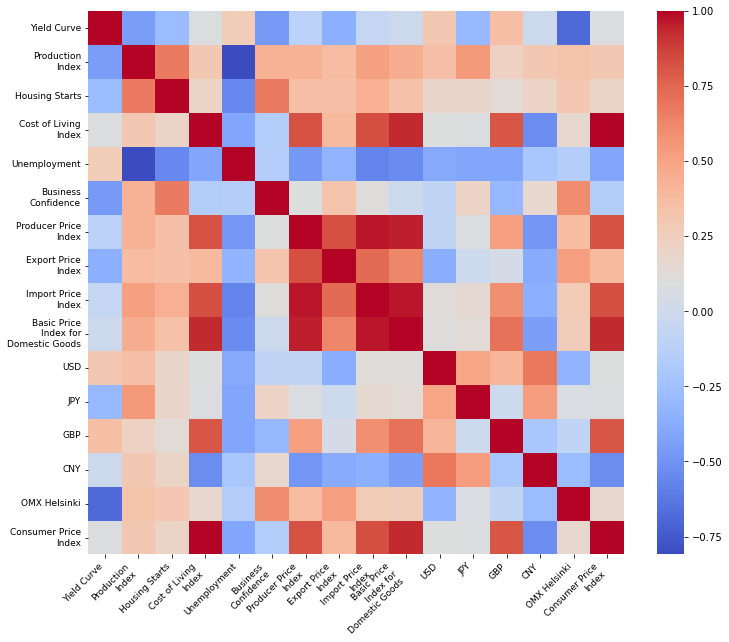

In [5]:
import seaborn as sns
import textwrap

fig, ax = plt.subplots(figsize=(12,10))

heatmap = sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
xlabels = [textwrap.fill(label.get_text(), 15) for label in ax.get_xticklabels()]
ax.set_xticklabels(xlabels)

# Wrap the y-axis labels
ylabels = [textwrap.fill(label.get_text(), 15) for label in ax.get_yticklabels()]
ax.set_yticklabels(ylabels)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=9, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)
plt.savefig('heatmap_pre.png', dpi=300)

In [6]:
X = inflation.drop('Consumer Price Index', axis=1)
y = inflation['Consumer Price Index']


#creating the x and y value for the dataset and creating a test and training set from them

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
scaler.fit (X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
heading = X.columns.tolist()
print (heading)

['Yield Curve', 'Production Index', 'Housing Starts', 'Cost of Living Index', 'Unemployment', 'Business Confidence', 'Producer Price Index', 'Export Price Index', 'Import Price Index', 'Basic Price Index for Domestic Goods', 'USD', 'JPY', 'GBP', 'CNY', 'OMX Helsinki']


In [8]:
inflation_tree = DecisionTreeRegressor(random_state=42, max_depth=11, min_samples_leaf=1, criterion='mse', splitter='best')

inflation_tree.fit(X_train_scaled, y_train)

y_pred_decision = inflation_tree.predict(X_test_scaled)
mse_tree = mse(y_test, y_pred_decision)
mae_tree = mae(y_test, y_pred_decision)
rsq_tree = r2s(y_test, y_pred_decision)
print ('MSE of Decision Tree: ', mse_tree)
print ('MAE of Decision Tree', mae_tree)
print ('R-Squared of Decision Tree', rsq_tree)

#best decision tree

MSE of Decision Tree:  0.3558571428571424
MAE of Decision Tree 0.3414285714285709
R-Squared of Decision Tree 0.9978083516445174


In [9]:
feature_importances = inflation_tree.feature_importances_
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 5.141776427066699e-05
Production Index: 6.1016540169994895e-05
Housing Starts: 0.0012615842728896814
Cost of Living Index: 0.8214325025171032
Unemployment: 1.731759491033372e-05
Business Confidence: 0.005647142867758135
Producer Price Index: 0.00016297691637337899
Export Price Index: 2.7505960073390185e-05
Import Price Index: 0.08173342688101067
Basic Price Index for Domestic Goods: 0.08485980568281751
USD: 5.7787954250951993e-05
JPY: 0.0005786209397239387
GBP: 3.0844093893993856e-05
CNY: 0.0039274081100687825
OMX Helsinki: 0.00015064190468523284
[5.141776427066699e-05, 6.1016540169994895e-05, 0.0012615842728896814, 0.8214325025171032, 1.731759491033372e-05, 0.005647142867758135, 0.00016297691637337899, 2.7505960073390185e-05, 0.08173342688101067, 0.08485980568281751, 5.7787954250951993e-05, 0.0005786209397239387, 3.0844093893993856e-05, 0.0039274081100687825, 0.00015064190468523284]


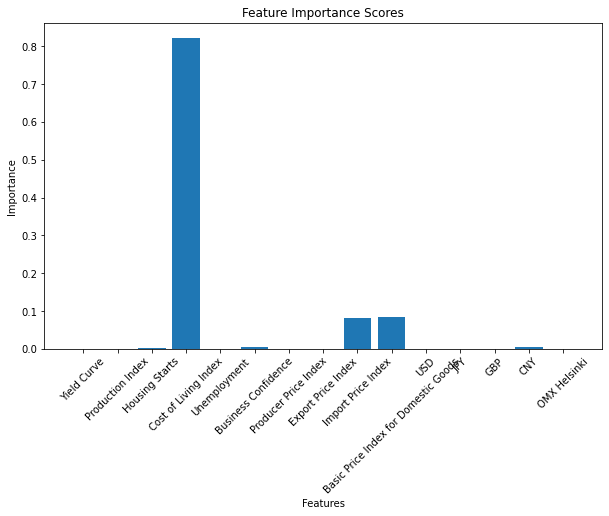

In [10]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [11]:
inflation_random = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=1, max_features='auto')
inflation_random.fit(X_train, y_train)
y_pred_rand = inflation_random.predict(X_test)
mse_rand = mse(y_test, y_pred_rand)
mae_rand = mae(y_test, y_pred_rand)
r2 = r2s(y_test, y_pred_rand)
print ('MSE of Random Forest:',mse_rand )
print ('MAE of Random Forest:',mae_rand )
print ('R-squared', r2)
#best random forest

MSE of Random Forest: 0.17438919196429767
MAE of Random Forest: 0.2574107142857175
R-squared 0.9989259741065928


In [12]:
feature_importances = inflation_random.feature_importances_
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 0.0004694797634434211
Production Index: 0.014385699902724288
Housing Starts: 0.00213452744720477
Cost of Living Index: 0.8746407490281118
Unemployment: 0.0004920827134148714
Business Confidence: 0.0023069708544445466
Producer Price Index: 0.009398483345827532
Export Price Index: 0.017374538358256118
Import Price Index: 0.013949447828713097
Basic Price Index for Domestic Goods: 0.055384782596880275
USD: 0.0007051859106083148
JPY: 0.003309693697268721
GBP: 0.0019628865461848704
CNY: 0.000852718596074261
OMX Helsinki: 0.002632753410843109
[0.0004694797634434211, 0.014385699902724288, 0.00213452744720477, 0.8746407490281118, 0.0004920827134148714, 0.0023069708544445466, 0.009398483345827532, 0.017374538358256118, 0.013949447828713097, 0.055384782596880275, 0.0007051859106083148, 0.003309693697268721, 0.0019628865461848704, 0.000852718596074261, 0.002632753410843109]


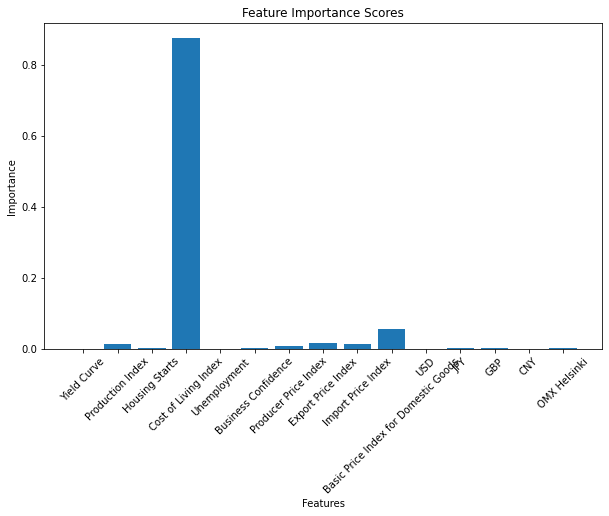

In [13]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [14]:
#After manual tuning
from sklearn.linear_model import Lasso

inflation_lasso = Lasso(alpha=0.01, fit_intercept=True, max_iter=1000, normalize=False, random_state=42)
inflation_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = inflation_lasso.predict(X_test_scaled)
mse_lasso = mse(y_test, y_pred_lasso)
mae_lasso = mae(y_test, y_pred_lasso)
r2_lasso = r2s(y_test, y_pred_lasso)
print ('MSE of LASSO:',mse_lasso )
print ('MAE of LASSO Forest:',mae_lasso )
print ('R-Squared of Lasso', r2_lasso)
#best lasso

MSE of LASSO: 0.011035182113808486
MAE of LASSO Forest: 0.06684124389262394
R-Squared of Lasso 0.9999320366635387


In [15]:
feature_importances = np.abs(inflation_lasso.coef_)
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 0.0
Production Index: 0.0
Housing Starts: 0.0
Cost of Living Index: 51.91296817662155
Unemployment: 0.0
Business Confidence: 0.0
Producer Price Index: 0.0
Export Price Index: 0.0
Import Price Index: 0.0
Basic Price Index for Domestic Goods: 0.0
USD: 0.0
JPY: 0.0
GBP: 0.0
CNY: 0.0
OMX Helsinki: 0.0
[0.0, 0.0, 0.0, 51.91296817662155, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


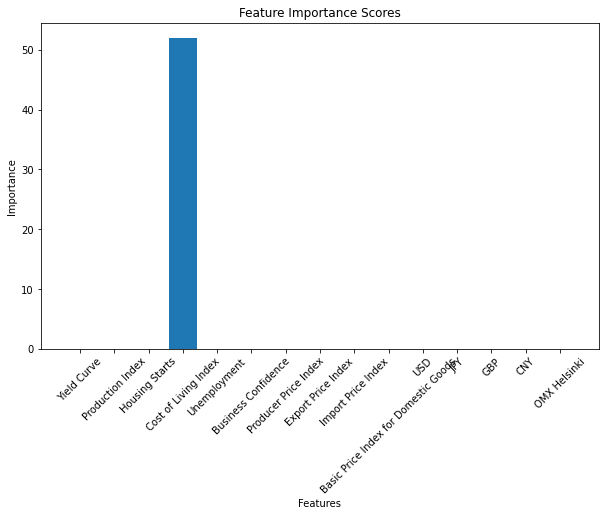

In [16]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.svm import SVR

svr = SVR (C=10, epsilon=0.01, kernel='linear')

# Train the SVR model on the training data
svr.fit(X_train_scaled, y_train)

# Evaluate the performance of the model on the testing data
y_pred = svr.predict(X_test_scaled)
mse_svr = mse(y_test, y_pred)
mae_svr = mae(y_test, y_pred)
r2_svr = r2s(y_test, y_pred)

print('MSE:', mse_svr)
print('MAE:', mae_svr)
print('R-squared:', r2_svr)

#grid search SVR
#best SVR

MSE: 0.02994133083022972
MAE: 0.12025002888168765
R-squared: 0.9998155977200621


In [18]:
feature_importances = np.abs(svr.coef_[0])
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 0.10971352571223025
Production Index: 0.30227823839995516
Housing Starts: 0.2947880143623953
Cost of Living Index: 45.972267046601196
Unemployment: 0.26934541793215194
Business Confidence: 0.016297006247775414
Producer Price Index: 3.0108674945457676
Export Price Index: 3.676787187504917
Import Price Index: 3.6686831517551144
Basic Price Index for Domestic Goods: 9.162485756176237
USD: 1.0463019243061158
JPY: 0.2997041614063374
GBP: 0.20028532523149423
CNY: 0.06353295278289472
OMX Helsinki: 0.06760462850916849
[0.10971352571223025, 0.30227823839995516, 0.2947880143623953, 45.972267046601196, 0.26934541793215194, 0.016297006247775414, 3.0108674945457676, 3.676787187504917, 3.6686831517551144, 9.162485756176237, 1.0463019243061158, 0.2997041614063374, 0.20028532523149423, 0.06353295278289472, 0.06760462850916849]


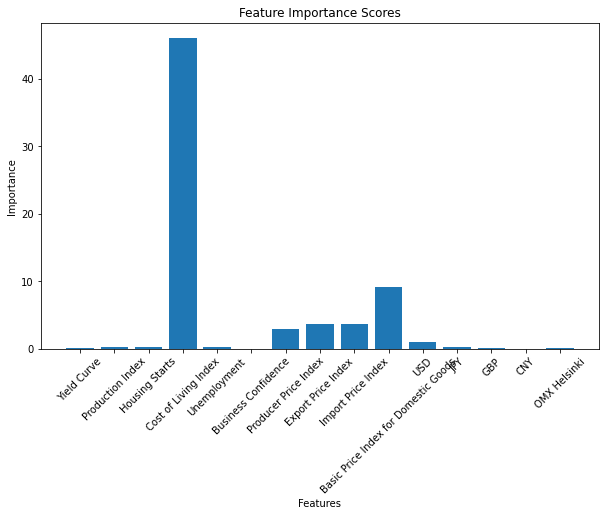

In [19]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [20]:
import xgboost as xgb
from xgboost import plot_importance

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, min_child_weight=1)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xg = xgb_model.predict(X_test_scaled)
mse_xg = mse(y_test, y_pred_xg )
mae_xg = mae(y_test, y_pred_xg )
rsq_xg = r2s(y_test, y_pred_xg )
print('MSE: ', mse_xg)
print ('MAE: ', mae_xg)
print ('R-squared: ', rsq_xg)
#grid search XGB
#best XGB

MSE:  0.09465420850848681
MAE:  0.2025775800432474
R-squared:  0.9994170448884304


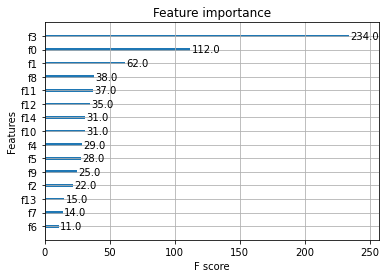

141

In [21]:
plot_importance(xgb_model)
plt.show()
141

In [22]:
importance_scores = xgb_model.get_booster().get_score(importance_type='weight')
print(importance_scores)


{'f0': 112.0, 'f1': 62.0, 'f2': 22.0, 'f3': 234.0, 'f4': 29.0, 'f5': 28.0, 'f6': 11.0, 'f7': 14.0, 'f8': 38.0, 'f9': 25.0, 'f10': 31.0, 'f11': 37.0, 'f12': 35.0, 'f13': 15.0, 'f14': 31.0}


Grid Search performed on Google Colab due to large runtime

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2s


# Train the artificial neural network
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='lbfgs', max_iter=4000, learning_rate='constant', alpha=0.01, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict the Consumer Price Index using the trained model
y_pred_mlp = model.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse_mlp = mse(y_test, y_pred_mlp)
mae_mlp = mae(y_test, y_pred_mlp)
rsq_mlp = r2s(y_test, y_pred_mlp)

# Print the Mean Squared Error
print('Mean Squared Error: ', mse_mlp)
print('Mean Absolute Error: ', mae_mlp)
print('R-squared: ', rsq_mlp)

#grid search MLP
#best MLP

Mean Squared Error:  0.004281388790105986
Mean Absolute Error:  0.04059493730518824
R-squared:  0.9999736318382548


In [24]:
# get the feature importances
importances = model.coefs_[0].sum(axis=1)

# normalize the importances
importances /= importances.sum()

# print the importances
for feature, importance in zip(heading, importances):
    print(feature, importance)


Yield Curve 0.38389137760866404
Production Index 0.2338662368453517
Housing Starts 0.3451105995254318
Cost of Living Index -1.9854179332327795
Unemployment 0.30138974626392745
Business Confidence 0.17407492902953747
Producer Price Index 0.035075680965986664
Export Price Index 0.06233464690834232
Import Price Index 0.12546619761555997
Basic Price Index for Domestic Goods 0.16091866014314155
USD 0.14636623981077293
JPY 0.1968600274628737
GBP 0.24810788210461998
CNY 0.3530466274084203
OMX Helsinki 0.21890908154014926
